In [1]:
import torch
import torch.nn as nn

#First Model Linear Regression

In [2]:
#fake data
train_X = torch.randn(100,1) #random numbers
train_Y = 3* train_X + 5 + torch.randn(100,1) * 0.5 #Linear function with limited randomness
#function 3* x_train + 5 + randomness

In [3]:
class LinearRegression(nn.Module):
    def __init__(self):
        super(LinearRegression,self).__init__()
        self.linear = nn.Linear(1,1) # takes one input produces one output
    #In pytorch you write your own forward functions
    def forward(self, x):
        return self.linear(x)

In [4]:
#Running the Linear Model ("Driver Code")
modelFFNN = LinearRegression()
lossFn = nn.MSELoss() #common also name criterion
optimizer = torch.optim.SGD(modelFFNN.parameters(), lr=0.01)
for epoch in range(150):
    prediction = modelFFNN(train_X)
    loss = lossFn(prediction, train_Y)
    optimizer.zero_grad() # you have to zero the gradients 
    loss.backward() # back propagation 
    optimizer.step() # Learning step 
    if epoch %10 == 0:
        print(f"Epoch:{epoch}, Training Loss:{loss.item()}")

Epoch:0, Training Loss:37.9466438293457
Epoch:10, Training Loss:25.46874237060547
Epoch:20, Training Loss:17.117843627929688
Epoch:30, Training Loss:11.528465270996094
Epoch:40, Training Loss:7.787067890167236
Epoch:50, Training Loss:5.282426357269287
Epoch:60, Training Loss:3.6055562496185303
Epoch:70, Training Loss:2.482771396636963
Epoch:80, Training Loss:1.7309088706970215
Epoch:90, Training Loss:1.2273797988891602
Epoch:100, Training Loss:0.8901236653327942
Epoch:110, Training Loss:0.664211630821228
Epoch:120, Training Loss:0.5128661394119263
Epoch:130, Training Loss:0.4114637076854706
Epoch:140, Training Loss:0.34351521730422974


In [5]:
for layer in modelFFNN.children():
    if isinstance(layer, nn.Linear):
        print(f"Model function = x * {layer.state_dict()['weight']} + {layer.state_dict()['bias']}")


Model function = x * tensor([[2.8740]]) + tensor([4.6858])


In [13]:
#Feed forward Neural Network Classification problem
from sklearn.datasets import make_moons
import numpy as np
# generating data using SKlearn 
# Makes two interleaving half circles.
# Its a simple toy dataset which visualizes clustering and classification algorithms 
X,Y = make_moons(n_samples=2000, noise=0.1)
train_X = torch.tensor(X, dtype=torch.float32)
train_Y = torch.tensor(Y, dtype=torch.int64)

test_x, test_y = make_moons(n_samples=400, noise=0.1)
test_X = torch.tensor(test_x, dtype=torch.float32)
test_Y = torch.tensor(test_y, dtype=torch.int64)


In [14]:
#Simple FFNN
class FFNN(nn.Module):
    def __init__(self,dimenisonalEmbedding):
        super(FFNN, self).__init__()
        self.layer1 = nn.Linear(2,dimenisonalEmbedding)
        self.layer2 = nn.Linear(dimenisonalEmbedding,2)
    def forward(self,x):
        x = torch.relu(self.layer1(x))
        return self.layer2(x)

In [15]:
modelFFNN = FFNN(100)
lossFnCE = nn.CrossEntropyLoss()
optimizer = torch.optim.Adam(modelFFNN.parameters(), lr=0.01)

# Training loop
modelFFNN.train() #technically not required
for epoch in range(1000):
    prediction = modelFFNN(train_X)
    loss = lossFnCE(prediction, train_Y)
    optimizer.zero_grad()
    loss.backward()
    optimizer.step()
    if epoch % 100 == 0:
        print(f"Epoch: {epoch}, Training Loss: {loss.item()}")

Epoch: 0, Training Loss: 0.6833396553993225
Epoch: 100, Training Loss: 0.022147512063384056
Epoch: 200, Training Loss: 0.0077016763389110565
Epoch: 300, Training Loss: 0.004653395619243383
Epoch: 400, Training Loss: 0.0033851738553494215
Epoch: 500, Training Loss: 0.0026818320620805025
Epoch: 600, Training Loss: 0.0022317892871797085
Epoch: 700, Training Loss: 0.0019269923213869333
Epoch: 800, Training Loss: 0.0017046021530404687
Epoch: 900, Training Loss: 0.0015318510122597218


In [10]:
predictionTest = modelFFNN(test_X)
testLoss = lossFnCE(predictionTest, test_Y)
print(f"Testing loss = {testLoss.item()}")

Testing loss = 0.0009852424263954163


In [30]:
import torchvision
import torchvision.transforms as transforms
from sklearn.model_selection import train_test_split

# dataset operations
# turns a image represented as a 2d array into a 1 d array
transform = transforms.Compose([transforms.ToTensor()])
data = torchvision.datasets.MNIST(root='./data', train=True, download=True, transform=transform)
train_data, test_data = train_test_split(data, test_size=0.1)



train_loader = torch.utils.data.DataLoader(train_data, batch_size=32, shuffle=True)
test_loader = torch.utils.data.DataLoader(test_data)

5


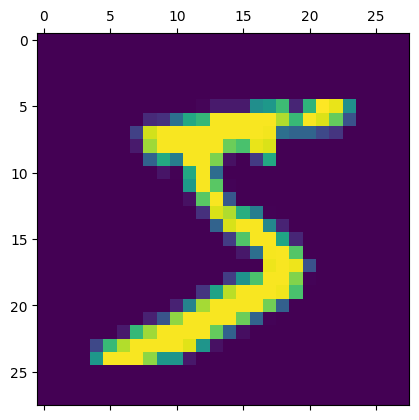

In [17]:
#don't copy this down just done to show the data 
#I need to reload the as I implictly transform the data in the perivous load  
from tensorflow import keras
import matplotlib.pyplot as mplt
#https://keras.io/api/datasets/
(example_x, example_y), (_, _) = keras.datasets.mnist.load_data()
mplt.matshow(example_x[0])
print(example_y[0])

In [31]:
class SimpleCNN(nn.Module):
    def __init__(self):
        super(SimpleCNN, self).__init__()
        self.conv1 = nn.Conv2d(1, 16, 3)
        self.fc1 = nn.Linear(16*26*26, 10)
    
    def forward(self, x):
        x = torch.relu(self.conv1(x))
        x = x.view(-1, 16*26*26)
        return self.fc1(x)

In [32]:
modelCNN = SimpleCNN()
lossFnCE = nn.CrossEntropyLoss()
optimizer = torch.optim.Adam(modelCNN.parameters(), lr=0.01)

# Training 
modelCNN.train()
for epoch in range(5):
    for images, labels in train_loader:
        prediction = modelCNN(images)
        loss = lossFnCE(prediction, labels)
        optimizer.zero_grad()
        loss.backward()
        optimizer.step()
    print(f"epoch {epoch+1}, training loss = {loss.item()}")

epoch 1, training loss = 0.01752931997179985
epoch 2, training loss = 0.03187795355916023
epoch 3, training loss = 0.01786775141954422
epoch 4, training loss = 0.008709493093192577
epoch 5, training loss = 0.3147363066673279


In [34]:
predictions = []
modelCNN.eval()
trueLabels = []
for images, labels in test_loader:
    prediction = modelCNN(images)
    predictions.append(int(np.argmax(prediction.detach())))
    trueLabels.append(int(labels))

# print(predictions)
# print(trueLabels)


In [35]:
from sklearn.metrics import confusion_matrix
cf_matrix = confusion_matrix(predictions, trueLabels)
cf_matrix


array([[574,   0,   1,   0,   0,   1,   0,   1,   3,   1],
       [  0, 630,   2,   0,   4,   0,   0,   5,   1,   1],
       [  1,   0, 593,   6,   1,   1,   0,   5,   3,   0],
       [  0,   0,   1, 594,   0,   2,   0,   0,   1,   1],
       [  1,   0,   2,   0, 625,   3,   0,   3,   5,   5],
       [  0,   0,   0,   5,   0, 494,   1,   1,   1,   1],
       [  6,   0,   1,   1,   2,   7, 566,   0,   3,   0],
       [  0,   2,   5,   5,   0,   0,   0, 633,   1,   9],
       [  5,   3,   5,   3,   2,   2,   6,   1, 569,   3],
       [  0,   0,   0,   3,   4,   1,   0,   3,   6, 563]], dtype=int64)

Text(95.72222222222221, 0.5, 'Actual Result')

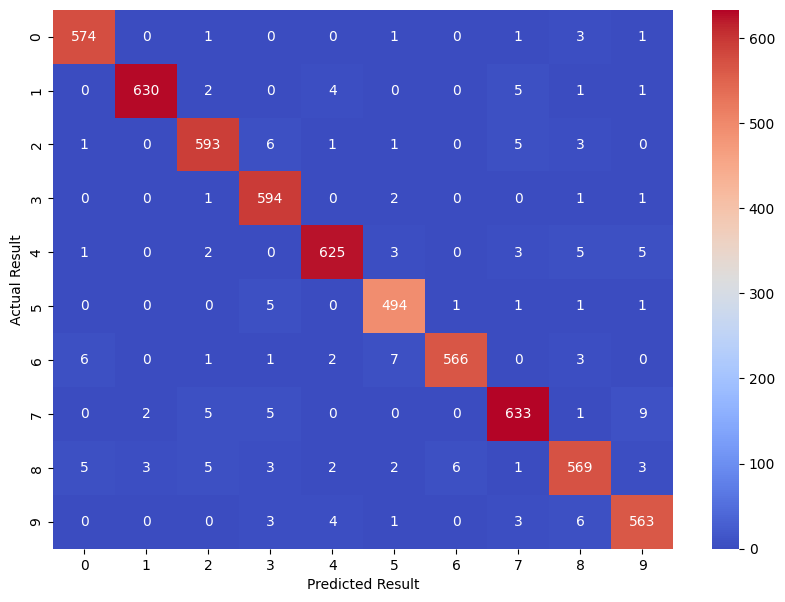

In [36]:
#Copied off this website https://medium.com/@dtuk81/confusion-matrix-visualization-fc31e3f30fea
import seaborn as sns
mplt.figure(figsize=(10,7))
sns.color_palette("bright", 10)
sns.heatmap(cf_matrix, annot=True, fmt="d", cmap="coolwarm")
mplt.xlabel('Predicted Result')
mplt.ylabel('Actual Result')